In [ ]:
Roua

In [49]:
import pandas as pd
from matplotlib import pyplot as plt




In [58]:
# chargement des donneés
data= pd.read_excel('Accidents.xls',index_col=0)
#affichage des 5 premiers lignes
data.head(5)

,nbreAccidents,Stops,Rate,Saison
Drivers,,,,
Chuck Weyant,2,2,0.108519,1959
Eddie Russo,2,2,0.108519,1960
Martin Brundle,11,11,0.596853,1996
Karun Chandhok,2,2,0.108519,2010
Howden Ganley,3,3,0.162778,1973


In [59]:
#importer le modele d'encodage
from sklearn.preprocessing import OrdinalEncoder

In [60]:
print(data.shape) # (18, 6)
#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]
#affichage des données
print(data)

(400, 4)
                    nbreAccidents  Stops      Rate  Saison
Drivers                                                   
Chuck Weyant                    2      2  0.108519    1959
Eddie Russo                     2      2  0.108519    1960
Martin Brundle                 11     11  0.596853    1996
Karun Chandhok                  2      2  0.108519    2010
Howden Ganley                   3      3  0.162778    1973
...                           ...    ...       ...     ...
Henri Pescarolo                 5      5  0.271297    1974
Hans-Joachim Stuck             19     19  1.030928    1979
Mike Taylor                     1      1  0.054259    1960
Mika Salo                       6      6  0.325556    1998
Danny Sullivan                  2      2  0.108519    1983

[400 rows x 4 columns]


In [61]:
#centrer et reduire les données
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
type(sc)



sklearn.preprocessing._data.StandardScaler

In [62]:
import numpy as np 

In [63]:
Z = sc.fit_transform(data)
print(Z)

[[-0.5329376  -0.5329376  -0.5329376  -1.11207827]
 [-0.5329376  -0.5329376  -0.5329376  -1.06433935]
 [ 1.30654021  1.30654021  1.30654023  0.65426198]
 ...
 [-0.73732402 -0.73732402 -0.73732403 -1.06433935]
 [ 0.28460809  0.28460809  0.2846081   0.74973983]
 [-0.5329376  -0.5329376  -0.5329376   0.03365594]]


In [64]:
# Nombre d'axes à retenir
import pandas as pd 
bs =1/np.arange(p,0,-1) 
bs = np.cumsum(bs) 
bs = bs[::-1]


In [65]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)
#valeur propre
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

4
[3.26570337e+00 7.34296632e-01 1.16981438e-15 6.49972912e-35]


In [66]:

#Afficher conjointement les valeurs propres et les seuils
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

     Val.Propre    Seuils
0  3.265703e+00  2.083333
1  7.342966e-01  1.083333
2  1.169814e-15  0.583333
3  6.499729e-35  0.250000


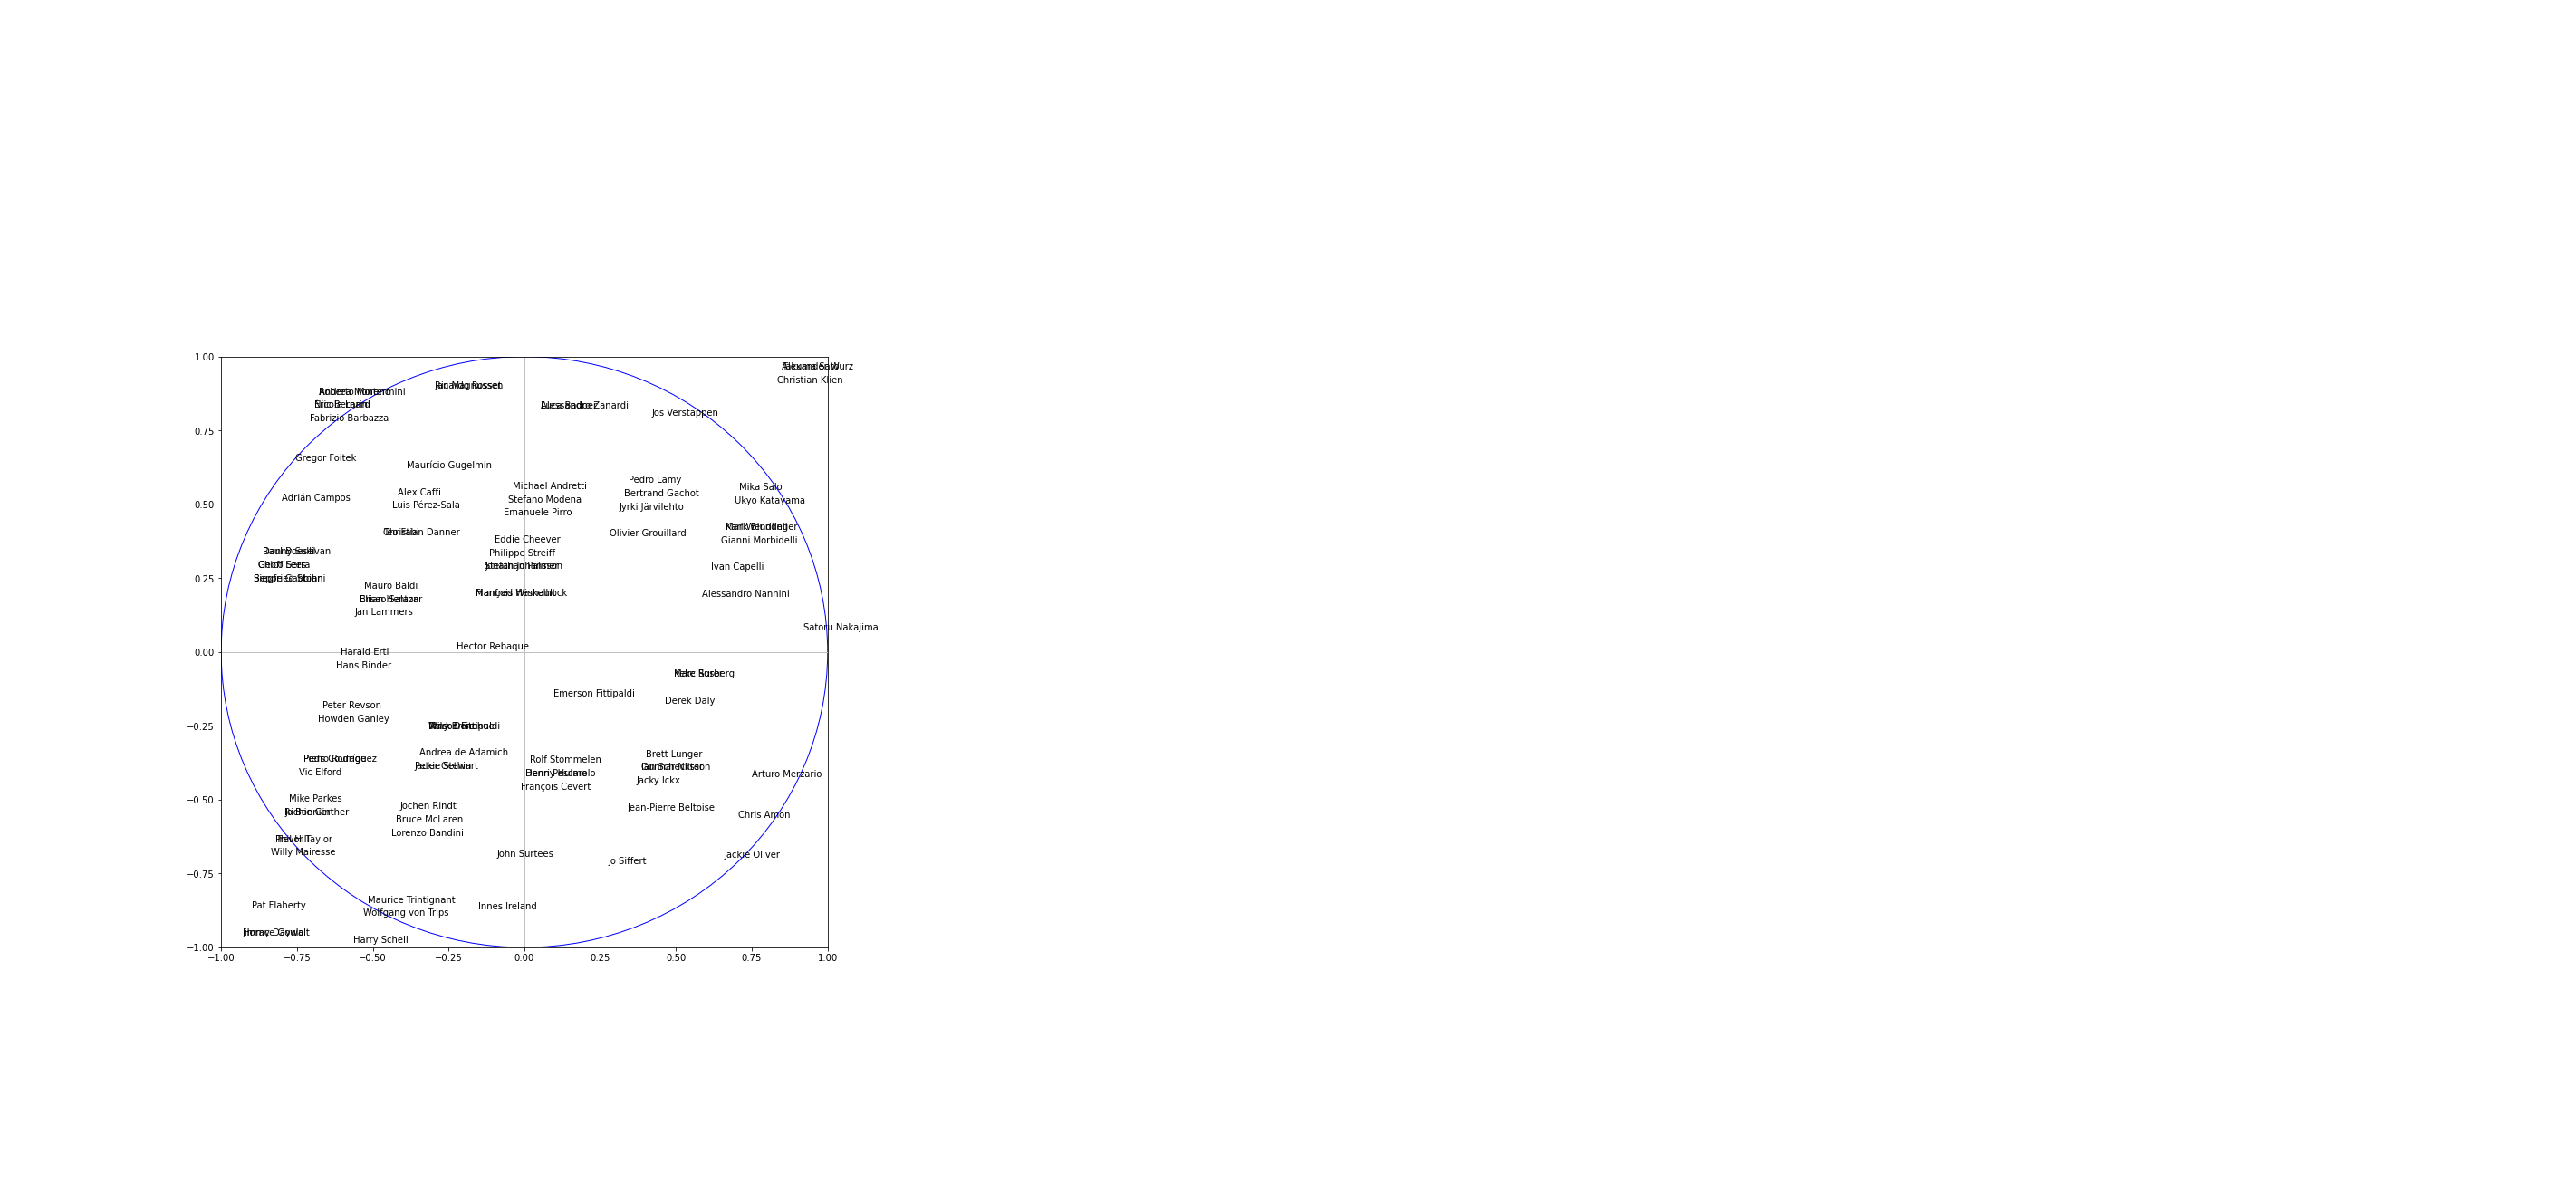

In [72]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-1,1) #même limites en abscisse
axes.set_ylim(-1,1) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(data.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


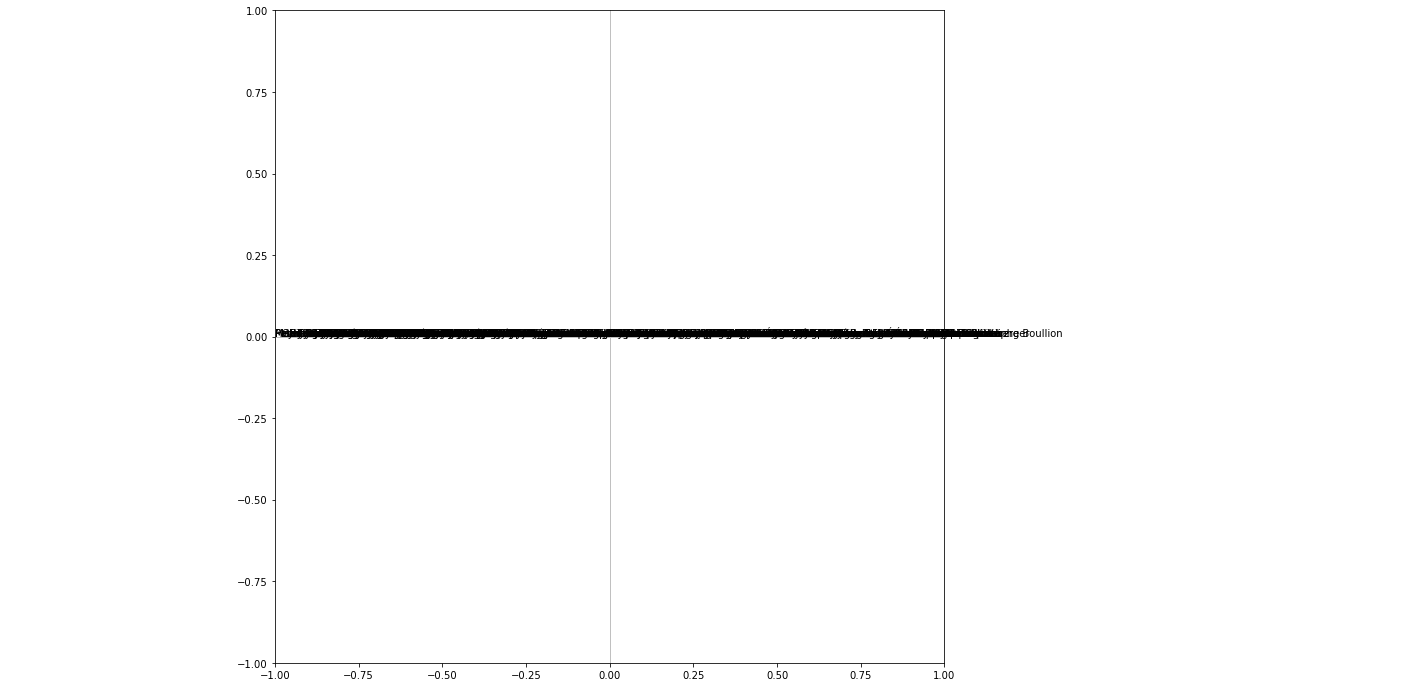